# Neural Network Hello World AKA MNIST problem

In this notebook, we will do a full implementation of the fashion MNIST.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
from torchvision import datasets, transforms

In [15]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

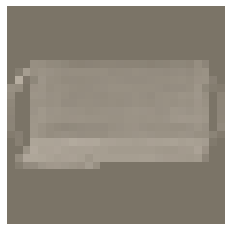

In [18]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

image, label = next(iter(trainloader))
imshow(image[0,:]);

Lets build our network

In [16]:
from torch import nn
import torch.nn.functional as F 
from torch import optim

model = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(model.parameters(), lr=lr)

epochs=5
for e in range(epochs):
    train_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()

        pred = model.forward(images)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    else:
        print(f'training loss: {train_loss/len(trainloader)}')

training loss: 1.3558144472809488
training loss: 0.7057263855931601
training loss: 0.5879510292557003
training loss: 0.5293036858314899
training loss: 0.49443285462698705


In [19]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

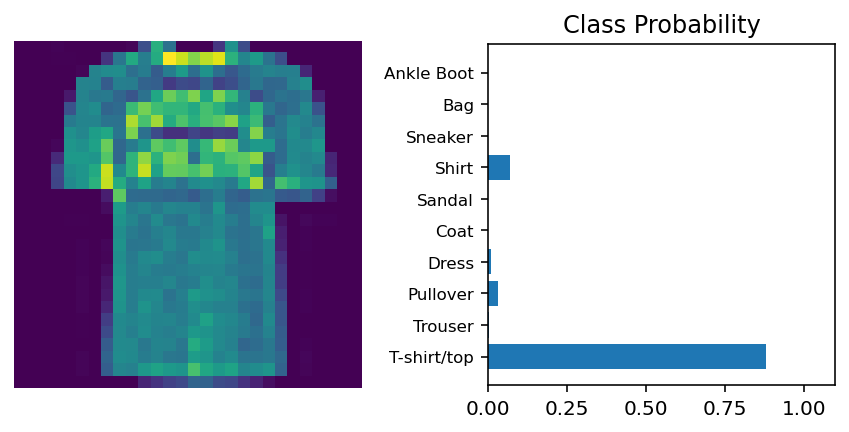

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')